<center><h1>DSCI-552 Homework 6</h1></center>
<br>
<center><font size="4">Name: Wenhao Zhang</font></center>
<center><font size="4">USC ID: 7036767117</font></center>

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

### (a) Download and read data

Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
column_names=['id','label',
              'mean_radius','mean_texture','mean_perimeter','mean_area',
              'mean_smoothness','mean_compactness','mean_concavity',
              'mean_concave_points','mean_symmetry','mean_fractal_dimension',
              'std_radius','std_texture','std_perimeter','std_area',
              'std_smoothness', 'std_compactness','std_concavity',
              'std_concave_points','std_symmetry','std_fractal_dimension',
              'worst_radius', 'worst_texture','worst_perimeter','worst_area', 
              'worst_smoothness','worst_compactness', 'worst_concavity',
              'worst_concave_points','worst_symmetry','worst_fractal_dimension']
data = pd.read_csv('../data/wdbc.data', header=None, names=column_names)
data = data.iloc[:,1:] # id is not a informative feature
data.replace({'B': 0, 'M': 1}, inplace=True)
data

,label,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
data['label'].value_counts()

0    357
1    212
Name: label, dtype: int64

In [4]:
X_data = data.iloc[:, 1:]
y_data = data.iloc[:, 0]
print(X_data.shape)
print(y_data.shape)

(569, 30)
(569,)


### (b)
**Monte-Carlo Simulation**: Repeat the following procedures for supervised, un- supervised, and semi-supervised learning M = 30 times, and use randomly se- lected train and test data (make sure you use 20% of both the positve and nega- tive classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

In [5]:
def split_data_set(data, test_size, random_state_index):
    positive = data.loc[data['label'] == 1]
    negative = data.loc[data['label'] == 0]
    
    X_p = positive.iloc[:, 1:]
    y_p = positive.iloc[:, 0]
    X_n = negative.iloc[:, 1:]
    y_n = negative.iloc[:, 0]
    
    X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=test_size, random_state=random_state_index)
    X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=test_size, random_state=random_state_index)
    
    X_train= np.concatenate((X_train_p, X_train_n), axis=0)
    X_test = np.concatenate((X_test_p, X_test_n), axis=0)
    y_train= np.concatenate((y_train_p, y_train_n), axis=0)
    y_test = np.concatenate((y_test_p, y_test_n), axis=0)
    
    return X_train, X_test, y_train, y_test

#### i.
**Supervised Learning**: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [6]:
def evaluation(y_true, y_pred, y_prob):
    # confusion matrix
    c_m = confusion_matrix(y_true, y_pred, labels=[0,1])

    TN, FP, FN, TP = c_m.ravel()
    total =  TN + FP + FN + TP
    
    # accuracy 
    accuracy = (TN + TP) / total
    
    # precision
    precision = TP / (TP + FP)
    
    # recall
    recall = TP/ (TP + FN)

    # F1-score
    F1_score = 2 * (precision * recall) / (precision + recall)

    # AUC
    auc = roc_auc_score(y_true, y_prob)
    
    return accuracy, precision, recall, F1_score, auc

In [7]:
def get_cm_and_roc(y_true, y_pred, y_prob, title):
    # confusion matrix
    c_m = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix: \n', c_m)

    # ROC and AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    print('ROC and AUC:')
    plt.title(title)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [58]:
def monte_carlo_supervised_learning(data, times):
    C_range = np.logspace(-3, 6, 10)
    train_evaluation_list = []
    test_evaluation_list = []
    
    for i in range(times):
        # Split the data set to training set and test set
        X_train, X_test, y_train, y_test = split_data_set(data, 0.2, i)
        
        # Build L1-penalized SVM classifier
        steps = [('normalizer', MinMaxScaler()),
                 ('classifier', LinearSVC(penalty='l1', dual=False, max_iter=10000))]
        pipeline = Pipeline(steps)
        l1_svc_params = {"classifier__C":C_range}
        l1_clf = GridSearchCV(pipeline, l1_svc_params, cv=5, n_jobs=-1)
        l1_clf.fit(X_train, y_train)
        
#         # Normalize the data
#         normalizer = MinMaxScaler().fit(X_train)
#         X_train_norm = normalizer.transform(X_train)
#         X_test_norm = normalizer.transform(X_test)
        
        # Get evaluation for training set
        y_train_pred = l1_clf.predict(X_train)
        y_train_prob = l1_clf.decision_function(X_train)
        train_evaluation = evaluation(y_train, y_train_pred, y_train_prob)
        train_evaluation_list.append(train_evaluation)
        
         # Get evaluation for test set
        y_test_pred = l1_clf.predict(X_test)
        y_test_prob = l1_clf.decision_function(X_test)
        test_evaluation = evaluation(y_test, y_test_pred, y_test_prob)
        test_evaluation_list.append(test_evaluation)
        
        print('Iteration', i+1, 'finished')
        
        # Plot the confusion matrix and the ROC in the last run
        if i == (times-1):
            print()
            print('For training set in last run', '-'*50)
            get_cm_and_roc(y_train, y_train_pred, y_train_prob, 'ROC of L1-penalized SVC (Supervised Learning) on Training Set')
            print('For test set in last run', '-'*50)
            get_cm_and_roc(y_test, y_test_pred, y_test_prob, 'ROC of L1-penalized SVC (Supervised Learning) on Test Set')
        
    return train_evaluation_list, test_evaluation_list

Iteration 1 finished
Iteration 2 finished
Iteration 3 finished
Iteration 4 finished
Iteration 5 finished
Iteration 6 finished
Iteration 7 finished
Iteration 8 finished
Iteration 9 finished
Iteration 10 finished
Iteration 11 finished
Iteration 12 finished
Iteration 13 finished
Iteration 14 finished
Iteration 15 finished
Iteration 16 finished
Iteration 17 finished
Iteration 18 finished
Iteration 19 finished
Iteration 20 finished
Iteration 21 finished
Iteration 22 finished
Iteration 23 finished
Iteration 24 finished
Iteration 25 finished
Iteration 26 finished
Iteration 27 finished
Iteration 28 finished
Iteration 29 finished
Iteration 30 finished

For training set in last run --------------------------------------------------
Confusion Matrix: 
 [[284   1]
 [  4 165]]
ROC and AUC:


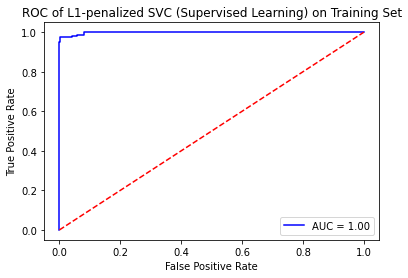

For test set in last run --------------------------------------------------
Confusion Matrix: 
 [[70  2]
 [ 2 41]]
ROC and AUC:


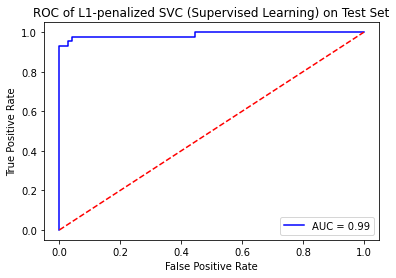

In [59]:
supervised_learning_result = monte_carlo_supervised_learning(data, 30)

In [10]:
def get_average(result):
    train_df = pd.DataFrame(result[0], columns=['train_accuracy','train_precision', 'train_recall', 'train_F1-score', 'train_AUC'])
    test_df = pd.DataFrame(result[1], columns=['test_accuracy','test_precision', 'test_recall', 'test_F1-score', 'test_AUC'])
    result_df = pd.concat([train_df,test_df], axis=1)
    print('For training set', '-'*50)
    print('Average accuracy:', result_df['train_accuracy'].mean())
    print('Average precision:', result_df['train_precision'].mean())
    print('Average recall:', result_df['train_recall'].mean())
    print('Average F1-score:', result_df['train_F1-score'].mean())
    print('Average AUC:', result_df['train_AUC'].mean())
    print()
    print('For test set', '-'*50)
    print('Average accuracy:', result_df['test_accuracy'].mean())
    print('Average precision:', result_df['test_precision'].mean())
    print('Average recall:', result_df['test_recall'].mean())
    print('Average F1-score:', result_df['test_F1-score'].mean())
    print('Average AUC:', result_df['test_AUC'].mean())

In [60]:
get_average(supervised_learning_result)

For training set --------------------------------------------------
Average accuracy: 0.9856093979442002
Average precision: 0.9905434230205267
Average recall: 0.9706114398422085
Average F1-score: 0.9804543295249444
Average AUC: 0.9976089138032458

For test set --------------------------------------------------
Average accuracy: 0.9695652173913043
Average precision: 0.9758321929011095
Average recall: 0.9426356589147288
Average F1-score: 0.9583526194584204
Average AUC: 0.9911714039621017


#### ii.
**Semi-Supervised Learning/ Self-training**: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

##### A. 
Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

##### B. 
Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [61]:
def monte_carlo_self_training(data, times):
    C_range = np.logspace(-3, 6, 10)
    l1_svc_params = {"C":C_range}
    train_evaluation_list = []
    test_evaluation_list = []
    
    for i in range(times):
        # Split the data set to training set and test set
        X_train, X_test, y_train, y_test = split_data_set(data, 0.2, i)
        
#         # Normalize the data
#         normalizer = MinMaxScaler().fit(X_train)
#         X_train_norm = normalizer.transform(X_train)
#         X_test_norm = normalizer.transform(X_test)
        
        # Split the training set to labeled set and unlabeled set
        train_data = pd.concat([pd.DataFrame(y_train, columns=['label']), pd.DataFrame(X_train, columns=X_data.columns)], axis=1)
        X_labeled, X_unlabeled, y_labeled, y_unlabeled = split_data_set(train_data, 0.5, i)
        
        # For question A, build L1-penalized SVM classifier and choose C using 5 fold cross validation
        steps = [('normalizer', MinMaxScaler()),
                 ('classifier', LinearSVC(penalty='l1', dual=False, max_iter=10000))]
        pipeline = Pipeline(steps)
        l1_svc_params = {"classifier__C":C_range}
        l1_clf = GridSearchCV(pipeline, l1_svc_params, cv=5, n_jobs=-1)
        l1_clf.fit(X_labeled, y_labeled)
        # best_C = l1_clf.best_params_['C']
        
        # For question B, do self-training
        while len(X_unlabeled) > 0:
            # Calculate distances from unlabeled data points to decision boundary
            distances = l1_clf.decision_function(X_unlabeled)
            distances_abs = np.abs(distances)
            
            # Get the farthest data point
            farthest_idx = distances_abs.argmax()
            farthest_data = X_unlabeled[farthest_idx]
            farthest_data_2d = farthest_data.reshape(1, -1)
            farthest_label = l1_clf.predict(farthest_data_2d)
            
            # Update the farthest data point to labeled data
            X_unlabeled = np.delete(X_unlabeled, farthest_idx, axis=0)
            X_labeled = np.append(X_labeled, farthest_data_2d, axis=0)
            y_labeled = np.append(y_labeled, farthest_label)
            
            # Refit the SVC
            # l1_clf.best_estimator_.fit(X_labeled, y_labeled)
            l1_clf = GridSearchCV(pipeline, l1_svc_params, cv=5, n_jobs=-1)
            l1_clf.fit(X_labeled, y_labeled)
            
        # Get evaluation for training set
        y_train_pred = l1_clf.predict(X_train)
        y_train_prob = l1_clf.decision_function(X_train)
        train_evaluation = evaluation(y_train, y_train_pred, y_train_prob)
        train_evaluation_list.append(train_evaluation)
        
         # Get evaluation for test set
        y_test_pred = l1_clf.predict(X_test)
        y_test_prob = l1_clf.decision_function(X_test)
        test_evaluation = evaluation(y_test, y_test_pred, y_test_prob)
        test_evaluation_list.append(test_evaluation)
        
        print('Iteration', i+1, 'finished')
        
        # Plot the confusion matrix and the ROC in the last run
        if i == (times-1):
            print()
            print('For training set in last run', '-'*50)
            get_cm_and_roc(y_train, y_train_pred, y_train_prob, 'ROC of L1-penalized SVC (Self_training) on Training Set')
            print('For test set in last run', '-'*50)
            get_cm_and_roc(y_test, y_test_pred, y_test_prob, 'ROC of L1-penalized SVC (Self_training) on Test Set')
        
    return train_evaluation_list, test_evaluation_list

Iteration 1 finished
Iteration 2 finished
Iteration 3 finished
Iteration 4 finished
Iteration 5 finished
Iteration 6 finished
Iteration 7 finished
Iteration 8 finished
Iteration 9 finished
Iteration 10 finished
Iteration 11 finished
Iteration 12 finished
Iteration 13 finished
Iteration 14 finished
Iteration 15 finished
Iteration 16 finished
Iteration 17 finished
Iteration 18 finished
Iteration 19 finished
Iteration 20 finished
Iteration 21 finished
Iteration 22 finished
Iteration 23 finished
Iteration 24 finished
Iteration 25 finished
Iteration 26 finished
Iteration 27 finished
Iteration 28 finished
Iteration 29 finished
Iteration 30 finished

For training set in last run --------------------------------------------------
Confusion Matrix: 
 [[283   2]
 [  6 163]]
ROC and AUC:


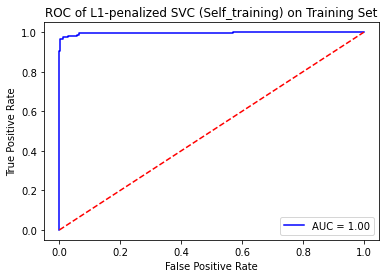

For test set in last run --------------------------------------------------
Confusion Matrix: 
 [[70  2]
 [ 3 40]]
ROC and AUC:


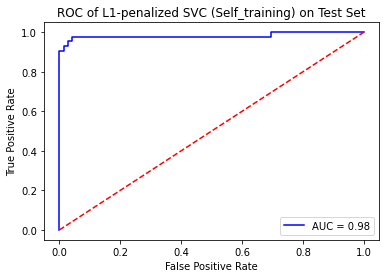

In [62]:
self_training_result = monte_carlo_self_training(data, 30)

In [63]:
get_average(self_training_result)

For training set --------------------------------------------------
Average accuracy: 0.9746696035242295
Average precision: 0.978194471122725
Average recall: 0.9536489151873769
Average F1-score: 0.9655629859933851
Average AUC: 0.9939042873455828

For test set --------------------------------------------------
Average accuracy: 0.9660869565217393
Average precision: 0.9636791028826871
Average recall: 0.9472868217054262
Average F1-score: 0.9540884482729337
Average AUC: 0.9902670111972438


#### iii. 
**Unsupervised Learning**: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

##### A. 
Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

**ANSWER**: 

To avoid being trapped in a local minimum:
* We can use **n_init** parameter to run k-means algorithm many times with different centroid seeds.
* We can set distinct **random state** in each run to achieve different initialization.

##### B. 
Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

##### C.
Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

In [15]:
def get_major_label(distances, y):
    cluster_1_distances = []
    cluster_2_distances = []
    
    for array in distances:
        cluster_1_distances.append(array[0])
        cluster_2_distances.append(array[1])
    
    # Find the closet 30 data points to each center
    cluster_1_closet_30 = np.argsort(cluster_1_distances)[:30]
    cluster_2_closet_30 = np.argsort(cluster_2_distances)[:30]  
    
    cluster_1_labels = []
    cluster_2_labels = []
    for index in cluster_1_closet_30:
        cluster_1_labels.append(y[index])
    for index in cluster_2_closet_30:
        cluster_2_labels.append(y[index])
        
    cluster_1_result = Counter(cluster_1_labels)
    cluster_2_result = Counter(cluster_2_labels)
    cluster_1_label = 0 if cluster_1_result[0] > cluster_1_result[1] else 1
    cluster_2_label = 0 if cluster_2_result[0] > cluster_2_result[1] else 1
    
    return cluster_1_label, cluster_2_label

In [16]:
def monte_carlo_unsupervised_training(data, times):
    train_evaluation_list = []
    test_evaluation_list = []
    
    for i in range(times):
        # Split the data set to training set and test set
        X_train, X_test, y_train, y_test = split_data_set(data, 0.2, i)
        
        # Normalize the data
        normalizer = MinMaxScaler().fit(X_train)
        X_train_norm = normalizer.transform(X_train)
        X_test_norm = normalizer.transform(X_test)
        
        # Build k-means clusterer
        kmeans = KMeans(n_clusters=2, n_init=100, random_state=i).fit(X_train_norm)
        train_cluster_distances = kmeans.transform(X_train_norm) # Transform X to a cluster-distance space
        train_cluster_labels = kmeans.predict(X_train_norm)
        
        # For question B
        # Take a mojority poll to get the label for each cluster
        train_cluster_1 = np.where(train_cluster_labels==0)
        train_cluster_2 = np.where(train_cluster_labels==1)
        cluster_1_label, cluster_2_label = get_major_label(train_cluster_distances, y_train)
        
        # Get preds for training set
        y_train_pred = train_cluster_labels.copy()
        y_train_pred[train_cluster_1] = cluster_1_label
        y_train_pred[train_cluster_2] = cluster_2_label
        
        # Get probs for training set
        if cluster_1_label == 0:
            y_train_prob = pd.DataFrame(train_cluster_distances).iloc[:,0]
        else:
            y_train_prob = pd.DataFrame(train_cluster_distances).iloc[:,1]
        
        # Evaluation for training set
        train_evaluation = evaluation(y_train, y_train_pred, y_train_prob)
        train_evaluation_list.append(train_evaluation)
        
        # For question C
        test_cluster_distances = kmeans.transform(X_test_norm)
        test_cluster_labels = kmeans.predict(X_test_norm)
        test_cluster_1 = np.where(test_cluster_labels==0)
        test_cluster_2 = np.where(test_cluster_labels==1)
        
        # Get preds for test set
        y_test_pred = test_cluster_labels.copy()
        y_test_pred[test_cluster_1] = cluster_1_label
        y_test_pred[test_cluster_2] = cluster_2_label
        
        # Get probs for test set
        if cluster_1_label == 0:
            y_test_prob = pd.DataFrame(test_cluster_distances).iloc[:,0]
        else:
            y_test_prob = pd.DataFrame(test_cluster_distances).iloc[:,1]
        
        # Evaluation for test set
        test_evaluation = evaluation(y_test, y_test_pred, y_test_prob)
        test_evaluation_list.append(test_evaluation)
    
        print('Iteration', i+1, 'finished')
        
        # Plot the confusion matrix and the ROC in the last run
        if i == (times-1):
            print()
            print('For training set in last run', '-'*50)
            get_cm_and_roc(y_train, y_train_pred, y_train_prob, 'ROC of K-means Classifier on Training Set')
            print('For test set in last run', '-'*50)
            get_cm_and_roc(y_test, y_test_pred, y_test_prob, 'ROC of K-means Classifier on Test Set')
        
    return train_evaluation_list, test_evaluation_list

Iteration 1 finished
Iteration 2 finished
Iteration 3 finished
Iteration 4 finished
Iteration 5 finished
Iteration 6 finished
Iteration 7 finished
Iteration 8 finished
Iteration 9 finished
Iteration 10 finished
Iteration 11 finished
Iteration 12 finished
Iteration 13 finished
Iteration 14 finished
Iteration 15 finished
Iteration 16 finished
Iteration 17 finished
Iteration 18 finished
Iteration 19 finished
Iteration 20 finished
Iteration 21 finished
Iteration 22 finished
Iteration 23 finished
Iteration 24 finished
Iteration 25 finished
Iteration 26 finished
Iteration 27 finished
Iteration 28 finished
Iteration 29 finished
Iteration 30 finished

For training set in last run --------------------------------------------------
Confusion Matrix: 
 [[278   7]
 [ 28 141]]
ROC and AUC:


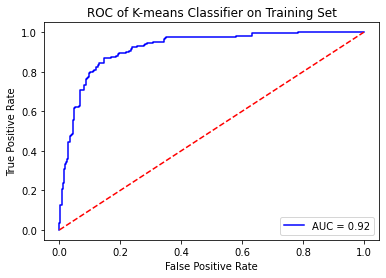

For test set in last run --------------------------------------------------
Confusion Matrix: 
 [[70  2]
 [ 4 39]]
ROC and AUC:


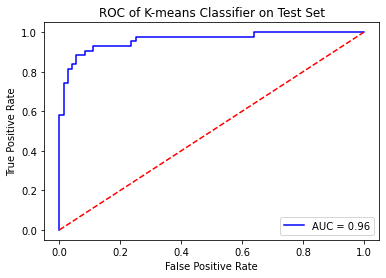

In [17]:
unsupervised_learning_result = monte_carlo_unsupervised_training(data, 30)

In [18]:
get_average(unsupervised_learning_result)

For training set --------------------------------------------------
Average accuracy: 0.9257709251101319
Average precision: 0.9484419349047394
Average recall: 0.8469428007889549
Average F1-score: 0.8946406884681787
Average AUC: 0.9260500363334374

For test set --------------------------------------------------
Average accuracy: 0.9249275362318842
Average precision: 0.9465201008360843
Average recall: 0.8472868217054264
Average F1-score: 0.8935268574928347
Average AUC: 0.9324827734711458


#### iv.
**Spectral Clustering**: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.

In [133]:
def evaluation_for_spectral_clustering(y_true, y_pred, fpr, tpr):
    # confusion matrix
    c_m = confusion_matrix(y_true, y_pred, labels=[0,1])

    TN, FP, FN, TP = c_m.ravel()
    total =  TN + FP + FN + TP
    
    # accuracy 
    accuracy = (TN + TP) / total
    
    # precision
    precision = TP / (TP + FP)
    
    # recall
    recall = TP/ (TP + FN)

    # F1-score
    F1_score = 2 * (precision * recall) / (precision + recall)

    # AUC
    roc_auc = auc(fpr, tpr)
    
    return accuracy, precision, recall, F1_score, roc_auc

In [134]:
def get_cm_and_roc_for_spectral_clustering(y_true, y_pred, fpr, tpr, title):
    # confusion matrix
    c_m = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix (threshold=0.5): \n', c_m)

    # ROC and AUC
    roc_auc = auc(fpr, tpr)

    print('ROC and AUC (threshold varies):')
    plt.title(title)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [135]:
def monte_carlo_spectral_clustering(data, times):
    train_evaluation_list = []
    test_evaluation_list = []
    
    for i in range(times):
        # Split the data set to training set and test set
        X_train, X_test, y_train, y_test = split_data_set(data, 0.2, i)
        
        # Normalize the data
        normalizer = MinMaxScaler().fit(X_train)
        X_train_norm = normalizer.transform(X_train)
        X_test_norm = normalizer.transform(X_test)
        
        # Build spectral clusterer
        clusterer = SpectralClustering(n_clusters=2, gamma=1, affinity='rbf', n_init=100, random_state=i, n_jobs=-1)
        train_cluster_labels = clusterer.fit_predict(X_train_norm)
        
        # Get the label for each cluster based on the entire points in it
        train_cluster_1, = np.where(train_cluster_labels==0)
        train_cluster_2, = np.where(train_cluster_labels==1)
        
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(X_train_norm, train_cluster_labels)
        
        # Change thresholds to get different tpr and fpr to obtain AUC and ROC
        train_tpr_list = []
        train_fpr_list = []
        test_tpr_list = []
        test_fpr_list = []
        cluster_1_labels,cluster_1_counts = np.unique(y_train[train_cluster_1], return_counts=True)
        cluster_2_labels,cluster_2_counts = np.unique(y_train[train_cluster_2], return_counts=True)
        for threshold in np.arange(0.1, 1.0, 0.1):
            if cluster_1_labels[0]==1 or (cluster_1_counts[1]/(cluster_1_counts[0]+cluster_1_counts[1]))>threshold:
                cluster_1_label = 1
            else:
                cluster_1_label = 0
        
            if cluster_2_labels[0]==1 or (cluster_2_counts[1]/(cluster_2_counts[0]+cluster_2_counts[1]))>threshold:
                cluster_2_label = 1
            else:
                cluster_2_label = 0
            
            # Get preds for training set
            y_train_pred = train_cluster_labels.copy()
            y_train_pred[train_cluster_1] = cluster_1_label
            y_train_pred[train_cluster_2] = cluster_2_label
        
            # Get preds for test set
            test_cluster_labels = knn.predict(X_test_norm)
            test_cluster_1 = np.where(test_cluster_labels==0)
            test_cluster_2 = np.where(test_cluster_labels==1)
            y_test_pred = test_cluster_labels.copy()
            y_test_pred[test_cluster_1] = cluster_1_label
            y_test_pred[test_cluster_2] = cluster_2_label
            
            # Get tpr and fpr for training set
            train_c_m = confusion_matrix(y_train, y_train_pred, labels=[0,1])
            train_TN, train_FP, train_FN, train_TP = train_c_m.ravel()
            train_tpr = train_TP / (train_TP + train_FP)
            train_fpr = train_FP / (train_FP + train_TN)
            train_tpr_list.append(train_tpr)
            train_fpr_list.append(train_fpr)
            
            # Get tpr and fpr for test set
            test_c_m = confusion_matrix(y_test, y_test_pred, labels=[0,1])
            test_TN, test_FP, test_FN, test_TP = test_c_m.ravel()
            test_tpr = test_TP / (test_TP + test_FP)
            test_fpr = test_FP / (test_FP + test_TN)
            test_tpr_list.append(test_tpr)
            test_fpr_list.append(test_fpr)
        
        # For other metrics, we use threshold as 0.5
        cluster_1_label = np.argmax(np.bincount(y_train[train_cluster_1]))
        cluster_2_label = np.argmax(np.bincount(y_train[train_cluster_2]))
        
        # Get preds for training set
        y_train_pred = train_cluster_labels.copy()
        y_train_pred[train_cluster_1] = cluster_1_label
        y_train_pred[train_cluster_2] = cluster_2_label
        
        # Evaluation for training set
        train_evaluation = evaluation_for_spectral_clustering(y_train, y_train_pred, train_fpr_list, train_tpr_list)
        train_evaluation_list.append(train_evaluation)
        
        # Get preds for test set
        test_cluster_labels = knn.predict(X_test_norm)
        test_cluster_1 = np.where(test_cluster_labels==0)
        test_cluster_2 = np.where(test_cluster_labels==1)
        y_test_pred = test_cluster_labels.copy()
        y_test_pred[test_cluster_1] = cluster_1_label
        y_test_pred[test_cluster_2] = cluster_2_label
        
        # Evaluation for test set
        test_evaluation = evaluation_for_spectral_clustering(y_test, y_test_pred, test_fpr_list, test_tpr_list)
        test_evaluation_list.append(test_evaluation)
        
        print('Iteration', i+1, 'finished')
        
        # Plot the confusion matrix and the ROC in the last run
        if i == (times-1):
            print()
            print('For training set in last run', '-'*50)
            get_cm_and_roc_for_spectral_clustering(y_train, y_train_pred, train_fpr_list, train_tpr_list, 'ROC of Spectral Clustering Classifier on Training Set')
            print('For test set in last run', '-'*50)
            get_cm_and_roc_for_spectral_clustering(y_test, y_test_pred, test_fpr_list, test_tpr_list, 'ROC of Spectral Clustering Classifier on Test Set')
        
    return train_evaluation_list, test_evaluation_list

Iteration 1 finished
Iteration 2 finished
Iteration 3 finished
Iteration 4 finished
Iteration 5 finished
Iteration 6 finished
Iteration 7 finished
Iteration 8 finished
Iteration 9 finished
Iteration 10 finished
Iteration 11 finished
Iteration 12 finished
Iteration 13 finished
Iteration 14 finished
Iteration 15 finished
Iteration 16 finished
Iteration 17 finished
Iteration 18 finished
Iteration 19 finished
Iteration 20 finished
Iteration 21 finished
Iteration 22 finished
Iteration 23 finished
Iteration 24 finished
Iteration 25 finished
Iteration 26 finished
Iteration 27 finished
Iteration 28 finished
Iteration 29 finished
Iteration 30 finished

For training set in last run --------------------------------------------------
Confusion Matrix (threshold=0.5): 
 [[282   3]
 [ 69 100]]
ROC and AUC (threshold varies):


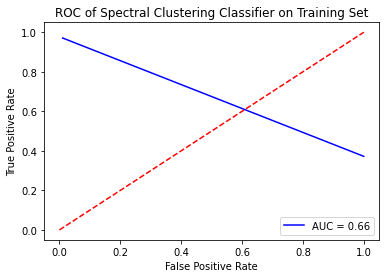

For test set in last run --------------------------------------------------
Confusion Matrix (threshold=0.5): 
 [[72  0]
 [14 29]]
ROC and AUC (threshold varies):


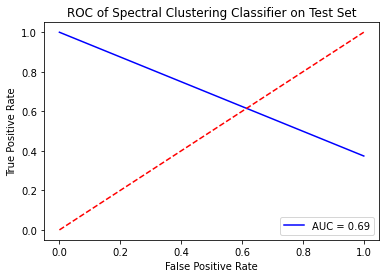

In [136]:
spectral_clustering_result = monte_carlo_spectral_clustering(data, 30)

In [137]:
get_average(spectral_clustering_result)

For training set --------------------------------------------------
Average accuracy: 0.8566813509544784
Average precision: 0.9829681531097043
Average recall: 0.6260355029585798
Average F1-score: 0.7637096699773388
Average AUC: 0.6731793787928689

For test set --------------------------------------------------
Average accuracy: 0.8550724637681157
Average precision: 0.9916986687147976
Average recall: 0.6178294573643409
Average F1-score: 0.7569831111379433
Average AUC: 0.6806537906348712


#### v.
One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled. One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

**ANSWER**: The results obtained by different methods are shown below.

| Algorithm | Train Accuracy | Train Precision | Train Recall | Train F1-score | Train AUC | Test Accuracy | Test Precision | Test Recall | Test F1-score | Test AUC |
| --------- | -------------- | --------------- | ------------ | -------------- | --------- | ------------- | -------------- | ----------- | ------------- | -------- |
| Supervised Learning | 0.9856 | 0.9905 | 0.9706 | 0.9804 | 0.9976 | 0.9695 | 0.9758 | 0.9426 | 0.9583 | 0.9911 |
| Self-training | 0.9746 | 0.9781 | 0.9536 | 0.9655 | 0.9939 | 0.9660 | 0.9636 | 0.9472 | 0.9540 | 0.9902 |
| Unsupervised Learning | 0.9257 | 0.9484 | 0.8469 | 0.8946 | 0.9260 | 0.9249 | 0.9465 | 0.8472 | 0.8935 | 0.9324 |
| Spectral Clustering | 0.8566 | 0.9829 | 0.6260 | 0.7637 | 0.6731 | 0.8550 | 0.9916 | 0.6178 | 0.7569 | 0.6806 |

* As we expected, supervised learning on the full data set works better than semi-supervised learning, but just a little.
* Also as we expected, unsupervised learning performs worse than supervised learning and semi-supervised learning.
* Spectral clustering has worse accuracy and recall, but has better precision than unsupervised learning.

## 2. Active Learning Using Support Vector Machines

### (a) Download and read data
Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [33]:
ba_data = pd.read_csv('../data/data_banknote_authentication.txt', header=None)
ba_data.columns=['variance', 'skewness', 'curtosis', 'entropy', 'class']
ba_data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [35]:
# Split data set to training set and test set
ba_train, ba_test = train_test_split(bank_data, test_size=472/1372, random_state=0)
print(ba_train.shape)
print(ba_test.shape)

(900, 5)
(472, 5)


### (b)
Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

#### i
Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [66]:
def monte_carlo_passive_learning(times):
    C_range = np.logspace(-3, 6, 10)
    avg_test_error_list = []
    
    for i in range(times):
        test_error_list = []
        train_set = ba_train.copy()
        test_set = ba_test.copy()
        X_test = ba_test.iloc[:,:4]
        y_test = ba_test.iloc[:,4]
        
        while len(train_set) > 0:
            # Sample 10 data points each time
            train_sample = train_set.sample(n=10, random_state=None, replace=False)
            X_train_sample = train_sample.iloc[:,:4]
            y_train_sample = train_sample.iloc[:,4]
            train_sample_index = np.array(train_sample.index)
            
            # If it's the first time, make sure there are two classes in the sample
            if len(train_set) == len(ba_train):
                while len(y_train_sample.value_counts()) == 1:
                    train_sample = train_set.sample(n=10, random_state=None, replace=False)
                    X_train_sample = train_sample.iloc[:,:4]
                    y_train_sample = train_sample.iloc[:,4]
                    train_sample_index = np.array(train_sample.index)
                X_train_selected = pd.DataFrame(X_train_sample)
                y_train_selected = pd.DataFrame(y_train_sample)
            else:
                y_train_sample = pd.DataFrame(y_train_sample)
                X_train_selected = pd.concat([X_train_selected, X_train_sample], axis=0, ignore_index=True)
                y_train_selected = pd.concat([y_train_selected, y_train_sample], axis=0, ignore_index=True)
            
            # Delete sampled data points from training set
            train_set = train_set.drop(train_sample_index)
            
            # Build l1-penalized SVM classifier
            steps = [('normalizer', MinMaxScaler()),
                     ('classifier', LinearSVC(penalty='l1', dual=False, max_iter=10000))]
            pipeline = Pipeline(steps)
            l1_svc_params = {"classifier__C":C_range}
            l1_clf = GridSearchCV(pipeline, l1_svc_params, cv=5, n_jobs=-1)
            l1_clf.fit(X_train_selected, y_train_selected)
            
            y_pred = l1_clf.predict(X_test)
            test_error_list.append(1-accuracy_score(y_test, y_pred))
        
        avg_test_error_list.append(test_error_list)
        
        print('Iteration', i+1, 'finished')
        
    return avg_test_error_list

In [67]:
passive_learning_result = monte_carlo_passive_learning(50)

Iteration 1 finished
Iteration 2 finished
Iteration 3 finished
Iteration 4 finished
Iteration 5 finished
Iteration 6 finished
Iteration 7 finished
Iteration 8 finished
Iteration 9 finished
Iteration 10 finished
Iteration 11 finished
Iteration 12 finished
Iteration 13 finished
Iteration 14 finished
Iteration 15 finished
Iteration 16 finished
Iteration 17 finished
Iteration 18 finished
Iteration 19 finished
Iteration 20 finished
Iteration 21 finished
Iteration 22 finished
Iteration 23 finished
Iteration 24 finished
Iteration 25 finished
Iteration 26 finished
Iteration 27 finished
Iteration 28 finished
Iteration 29 finished
Iteration 30 finished
Iteration 31 finished
Iteration 32 finished
Iteration 33 finished
Iteration 34 finished
Iteration 35 finished
Iteration 36 finished
Iteration 37 finished
Iteration 38 finished
Iteration 39 finished
Iteration 40 finished
Iteration 41 finished
Iteration 42 finished
Iteration 43 finished
Iteration 44 finished
Iteration 45 finished
Iteration 46 finish

#### ii.
Train a SVM with a pool of 10randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [71]:
def monte_carlo_active_learning(times):
    C_range = np.logspace(-3, 6, 10)
    avg_test_error_list = []
    
    for i in range(times):
        test_error_list = []
        train_set = ba_train.copy()
        test_set = ba_test.copy()
        X_test = ba_test.iloc[:,:4]
        y_test = ba_test.iloc[:,4]
        
        while len(train_set) > 0:
            # If it's the first time, make sure there are two classes in the sample
            if len(train_set) == len(ba_train):
                # Randomly sample 10 data points for the first time
                train_sample = train_set.sample(n=10, random_state=None, replace=False)
                X_train_sample = train_sample.iloc[:,:4]
                y_train_sample = train_sample.iloc[:,4]
                train_sample_index = np.array(train_sample.index)
                
                while len(y_train_sample.value_counts()) == 1:
                    train_sample = train_set.sample(n=10, random_state=None, replace=False)
                    X_train_sample = train_sample.iloc[:,:4]
                    y_train_sample = train_sample.iloc[:,4]
                    train_sample_index = np.array(train_sample.index)
                X_train_selected = pd.DataFrame(X_train_sample)
                y_train_selected = pd.DataFrame(y_train_sample)
            else:
                # Find the 10 closet data points to the hyperplane 
                distances = l1_clf.decision_function(train_set.iloc[:,:4])
                distances_abs = np.abs(distances)
                closet_10_data = np.argsort(distances_abs)[:10]
                
                train_sample = train_set.iloc[closet_10_data]
                X_train_sample = train_sample.iloc[:,:4]
                y_train_sample = train_sample.iloc[:,4]
                y_train_sample = pd.DataFrame(y_train_sample)
                train_sample_index = np.array(train_sample.index)
                X_train_selected = pd.concat([X_train_selected, X_train_sample], axis=0, ignore_index=True)
                y_train_selected = pd.concat([y_train_selected, y_train_sample], axis=0, ignore_index=True)
            
            # Delete sampled data points from training set
            train_set = train_set.drop(train_sample_index)
            
            # Build l1-penalized SVM classifier
            steps = [('normalizer', MinMaxScaler()),
                     ('classifier', LinearSVC(penalty='l1', dual=False, max_iter=10000))]
            pipeline = Pipeline(steps)
            l1_svc_params = {"classifier__C":C_range}
            l1_clf = GridSearchCV(pipeline, l1_svc_params, cv=5, n_jobs=-1)
            l1_clf.fit(X_train_selected, y_train_selected)
            
            y_pred = l1_clf.predict(X_test)
            test_error_list.append(1-accuracy_score(y_test, y_pred))
        
        avg_test_error_list.append(test_error_list)
        
        print('Iteration', i+1, 'finished')
        
    return avg_test_error_list

In [72]:
active_learning_result = monte_carlo_active_learning(50)

Iteration 1 finished
Iteration 2 finished
Iteration 3 finished
Iteration 4 finished
Iteration 5 finished
Iteration 6 finished
Iteration 7 finished
Iteration 8 finished
Iteration 9 finished
Iteration 10 finished
Iteration 11 finished
Iteration 12 finished
Iteration 13 finished
Iteration 14 finished
Iteration 15 finished
Iteration 16 finished
Iteration 17 finished
Iteration 18 finished
Iteration 19 finished
Iteration 20 finished
Iteration 21 finished
Iteration 22 finished
Iteration 23 finished
Iteration 24 finished
Iteration 25 finished
Iteration 26 finished
Iteration 27 finished
Iteration 28 finished
Iteration 29 finished
Iteration 30 finished
Iteration 31 finished
Iteration 32 finished
Iteration 33 finished
Iteration 34 finished
Iteration 35 finished
Iteration 36 finished
Iteration 37 finished
Iteration 38 finished
Iteration 39 finished
Iteration 40 finished
Iteration 41 finished
Iteration 42 finished
Iteration 43 finished
Iteration 44 finished
Iteration 45 finished
Iteration 46 finish

### (c)
Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

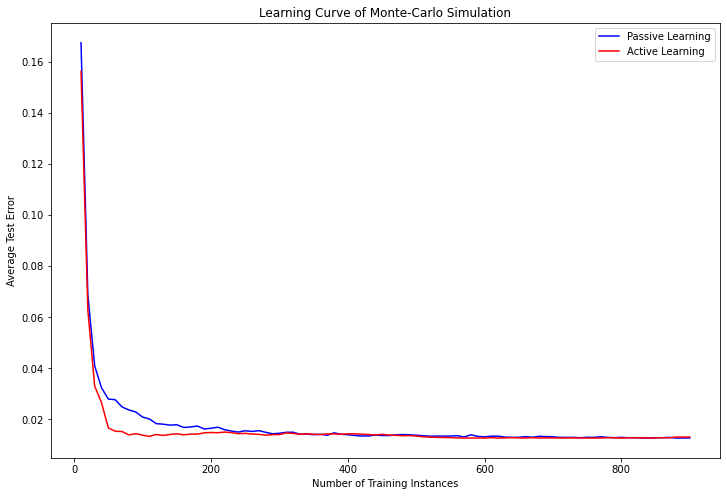

In [82]:
passive_learning_errors = pd.DataFrame(passive_learning_result).mean()
active_learning_errors = pd.DataFrame(active_learning_result).mean()
plt.figure(figsize=(12,8))
plt.plot(np.arange(10,910,10), passive_learning_errors, color='blue', label='Passive Learning')
plt.plot(np.arange(10,910,10), active_learning_errors, color='red', label='Active Learning')
plt.xlabel('Number of Training Instances')
plt.ylabel('Average Test Error')
plt.title('Learning Curve of Monte-Carlo Simulation')
plt.legend()
plt.show()

**Conclusion**:
* In general, with the number of training instances increasing, the average test error tends to become smaller.
* When the number of training instances is relatively small, ative learning reaches a low test error faster than passive learning. That is because that active learning makes use of the informative and influential data points in early iterations.
* When the number of training instances becomes large enough, which means algorithms get enough information about data set, the average test errors of two learning methods are steady and almost the same.

## References and Citations

#### 1. sklearn.preprocessing.MinMaxScaler
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

#### 2. add or delete a line of 2d numpy arrays
https://blog.csdn.net/ShawnSu/article/details/77840642

https://blog.csdn.net/ShaoDu/article/details/94630657

#### 3. sklearn.cluster.KMeans
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#### 4. collections.Counter
https://docs.python.org/3/library/collections.html#collections.Counter

#### 5. sklearn.cluster.SpectralClustering
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

#### 6. numpy.bincount
https://numpy.org/doc/stable/reference/generated/numpy.bincount.html

#### 7. Count the number of distinct elements in numpry array
https://blog.csdn.net/huangguohui_123/article/details/103592169